In [38]:
#import salaries (1).json data in and read it
import numpy as np
from sklearn.linear_model import LinearRegression
import polars as pl
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  

# Open the file for reading into a df
# Define the file path?
file_path = 'salaries (1).json'

# Read the file into a dataframe
df = pl.read_json(file_path)

# Display the dataframe
print(df)     


shape: (9_268, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ work_year ┆ experienc ┆ employmen ┆ job_title ┆ … ┆ employee_ ┆ remote_ra ┆ company_l ┆ company_ │
│ ---       ┆ e_level   ┆ t_type    ┆ ---       ┆   ┆ residence ┆ tio       ┆ ocation   ┆ size     │
│ str       ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆           ┆   ┆ str       ┆ i64       ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆           ┆           ┆          │
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆       

In [39]:
#filter and count total for each employment_type for CT,FL,FT,PT?

#filter and count total for contract employment_type
employmentTypeCount = (
    df
    .groupby('employment_type')
    .agg(
        employmentType_total = pl.count()
    )
    )
print(employmentTypeCount)



shape: (4, 2)
┌─────────────────┬──────────────────────┐
│ employment_type ┆ employmentType_total │
│ ---             ┆ ---                  │
│ str             ┆ u32                  │
╞═════════════════╪══════════════════════╡
│ FL              ┆ 12                   │
│ PT              ┆ 15                   │
│ FT              ┆ 9222                 │
│ CT              ┆ 19                   │
└─────────────────┴──────────────────────┘


/tmp/ipykernel_21419/2520150901.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('employment_type')


In [40]:
#filter and count total for employee_residence
employmentResidenceCount = (
    df
    .groupby('employee_residence')
    .agg(
        employmentResidence_total = pl.count()
    )
    .sort('employmentResidence_total')
    .reverse()
    .head(10)
    )
print(employmentResidenceCount)

/tmp/ipykernel_21419/1496646664.py:4: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('employee_residence')


shape: (10, 2)
┌────────────────────┬───────────────────────────┐
│ employee_residence ┆ employmentResidence_total │
│ ---                ┆ ---                       │
│ str                ┆ u32                       │
╞════════════════════╪═══════════════════════════╡
│ US                 ┆ 7942                      │
│ GB                 ┆ 436                       │
│ CA                 ┆ 220                       │
│ ES                 ┆ 117                       │
│ …                  ┆ …                         │
│ FR                 ┆ 54                        │
│ PT                 ┆ 26                        │
│ AU                 ┆ 21                        │
│ NL                 ┆ 21                        │
└────────────────────┴───────────────────────────┘


In [41]:
fullTime = ['FT']
theStates = ['US']

#filter out employment type full time and employee residence US
employmentDataFilter = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
)
print(employmentDataFilter)

shape: (7_929, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ work_year ┆ experienc ┆ employmen ┆ job_title ┆ … ┆ employee_ ┆ remote_ra ┆ company_l ┆ company_ │
│ ---       ┆ e_level   ┆ t_type    ┆ ---       ┆   ┆ residence ┆ tio       ┆ ocation   ┆ size     │
│ str       ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆           ┆   ┆ str       ┆ i64       ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆           ┆           ┆          │
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆       

In [42]:
#filter and count total for job_title
fullTime = ['FT']
theStates = ['US']
employeeJobTitle = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('job_title')
    .agg(
        employeeJobTitle_total = pl.count()
    )
    )
print(employeeJobTitle)

/tmp/ipykernel_21419/2802393274.py:8: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('job_title')


shape: (101, 2)
┌───────────────────────────────────┬────────────────────────┐
│ job_title                         ┆ employeeJobTitle_total │
│ ---                               ┆ ---                    │
│ str                               ┆ u32                    │
╞═══════════════════════════════════╪════════════════════════╡
│ BI Data Analyst                   ┆ 4                      │
│ Lead Data Engineer                ┆ 1                      │
│ Machine Learning Engineer         ┆ 840                    │
│ Data Manager                      ┆ 122                    │
│ …                                 ┆ …                      │
│ Business Intelligence Analyst     ┆ 48                     │
│ Data Science Practitioner         ┆ 10                     │
│ Principal Machine Learning Engin… ┆ 1                      │
│ Cloud Database Engineer           ┆ 5                      │
└───────────────────────────────────┴────────────────────────┘


In [43]:
#filter and count total for job_title show top 10 jobs
fullTime = ['FT']
theStates = ['US']
employeeJobTitle = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('job_title')
    .agg(
        employeeJobTitle_total=pl.count()
    )
    .sort('employeeJobTitle_total')  
    .reverse()
    .head(52)  # Selecting the top 10 rows
    
)

print(employeeJobTitle)


shape: (52, 2)
┌───────────────────────────────────┬────────────────────────┐
│ job_title                         ┆ employeeJobTitle_total │
│ ---                               ┆ ---                    │
│ str                               ┆ u32                    │
╞═══════════════════════════════════╪════════════════════════╡
│ Data Engineer                     ┆ 1895                   │
│ Data Scientist                    ┆ 1683                   │
│ Data Analyst                      ┆ 1198                   │
│ Machine Learning Engineer         ┆ 840                    │
│ …                                 ┆ …                      │
│ NLP Engineer                      ┆ 6                      │
│ Data Developer                    ┆ 6                      │
│ Data Product Manager              ┆ 6                      │
│ Applied Machine Learning Scienti… ┆ 5                      │
└───────────────────────────────────┴────────────────────────┘


/tmp/ipykernel_21419/2913539598.py:8: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('job_title')


In [44]:
#filter and count total for job_title show top 10 jobs
fullTime = ['FT']
theStates = ['US']
employeeJobTitle = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('job_title')
    .agg(
        employeeJobTitle_total=pl.count()
    )
    .sort('employeeJobTitle_total')  
    .reverse()
    .head(42)  # Selecting the top 10 rows
    
)

print(employeeJobTitle)


shape: (42, 2)
┌───────────────────────────────────┬────────────────────────┐
│ job_title                         ┆ employeeJobTitle_total │
│ ---                               ┆ ---                    │
│ str                               ┆ u32                    │
╞═══════════════════════════════════╪════════════════════════╡
│ Data Engineer                     ┆ 1895                   │
│ Data Scientist                    ┆ 1683                   │
│ Data Analyst                      ┆ 1198                   │
│ Machine Learning Engineer         ┆ 840                    │
│ …                                 ┆ …                      │
│ Data Science Practitioner         ┆ 10                     │
│ MLOps Engineer                    ┆ 10                     │
│ Machine Learning Software Engine… ┆ 9                      │
│ Data Science Engineer             ┆ 8                      │
└───────────────────────────────────┴────────────────────────┘


/tmp/ipykernel_21419/2462033275.py:8: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('job_title')


In [45]:
#filter and count total for remote_ratio
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employmentRemote = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('remote_ratio')
    .agg(
        employmentRemote_total = pl.count()
    )
    )
print(employmentRemote)

shape: (3, 2)
┌──────────────┬────────────────────────┐
│ remote_ratio ┆ employmentRemote_total │
│ ---          ┆ ---                    │
│ i64          ┆ u32                    │
╞══════════════╪════════════════════════╡
│ 0            ┆ 3521                   │
│ 100          ┆ 2075                   │
│ 50           ┆ 20                     │
└──────────────┴────────────────────────┘


/tmp/ipykernel_21419/2727686209.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('remote_ratio')


In [46]:
#filter and count total for experience_level
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('experience_level')
    .agg(
        employeeExperienceLevel_total = pl.count()
    )
    )
print(employeeExperienceLevel)

shape: (4, 2)
┌──────────────────┬───────────────────────────────┐
│ experience_level ┆ employeeExperienceLevel_total │
│ ---              ┆ ---                           │
│ str              ┆ u32                           │
╞══════════════════╪═══════════════════════════════╡
│ MI               ┆ 902                           │
│ EN               ┆ 224                           │
│ EX               ┆ 144                           │
│ SE               ┆ 4346                          │
└──────────────────┴───────────────────────────────┘


/tmp/ipykernel_21419/2162794735.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('experience_level')


In [47]:
#filter and count total for experience_level
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('experience_level')
    .agg(
        employeeExperienceLevel_total = pl.count()
    )
    )
print(employeeExperienceLevel)

shape: (4, 2)
┌──────────────────┬───────────────────────────────┐
│ experience_level ┆ employeeExperienceLevel_total │
│ ---              ┆ ---                           │
│ str              ┆ u32                           │
╞══════════════════╪═══════════════════════════════╡
│ SE               ┆ 4346                          │
│ EN               ┆ 224                           │
│ EX               ┆ 144                           │
│ MI               ┆ 902                           │
└──────────────────┴───────────────────────────────┘


/tmp/ipykernel_21419/2162794735.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('experience_level')


In [48]:
#filter and count total for company_size
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employerCompanySize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('company_size')
    .agg(
        employerCompanySize_total = pl.count()
    )
    )
print(employerCompanySize)

shape: (3, 2)
┌──────────────┬───────────────────────────┐
│ company_size ┆ employerCompanySize_total │
│ ---          ┆ ---                       │
│ str          ┆ u32                       │
╞══════════════╪═══════════════════════════╡
│ L            ┆ 203                       │
│ M            ┆ 5385                      │
│ S            ┆ 28                        │
└──────────────┴───────────────────────────┘


/tmp/ipykernel_21419/1734881984.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('company_size')


In [49]:
#filter and count total for salary_in_usd
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalary = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd')
    .agg(
        employeeSalary_total = pl.count()
    )
    )
print(employeeSalary)

shape: (1_091, 2)
┌───────────────┬──────────────────────┐
│ salary_in_usd ┆ employeeSalary_total │
│ ---           ┆ ---                  │
│ str           ┆ u32                  │
╞═══════════════╪══════════════════════╡
│ 73400         ┆ 1                    │
│ 240350        ┆ 1                    │
│ 120096        ┆ 1                    │
│ 111967        ┆ 1                    │
│ …             ┆ …                    │
│ 179305        ┆ 1                    │
│ 184100        ┆ 2                    │
│ 280700        ┆ 1                    │
│ 105400        ┆ 1                    │
└───────────────┴──────────────────────┘


/tmp/ipykernel_21419/3801413792.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd')


In [50]:
#filter and count total for salary_in_usd
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalary = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd')
    .agg(
        employeeSalary_total = pl.count()
    )
    .sort('employeeSalary_total')
    .reverse()
    .head(10)
    )
print(employeeSalary)


/tmp/ipykernel_21419/268392807.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd')


shape: (10, 2)
┌───────────────┬──────────────────────┐
│ salary_in_usd ┆ employeeSalary_total │
│ ---           ┆ ---                  │
│ str           ┆ u32                  │
╞═══════════════╪══════════════════════╡
│ 160000        ┆ 142                  │
│ 150000        ┆ 139                  │
│ 130000        ┆ 134                  │
│ 120000        ┆ 110                  │
│ …             ┆ …                    │
│ 145000        ┆ 85                   │
│ 200000        ┆ 80                   │
│ 135000        ┆ 78                   │
│ 180000        ┆ 78                   │
└───────────────┴──────────────────────┘


In [51]:
#filter and count total for salary_in_usd with experience_level showing 
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalaryWExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd', 'experience_level')
    .agg(
        employeeSalaryWExperienceLevel = pl.count()
    )
    )
print(employeeSalaryWExperienceLevel)

shape: (1_383, 3)
┌───────────────┬──────────────────┬────────────────────────────────┐
│ salary_in_usd ┆ experience_level ┆ employeeSalaryWExperienceLevel │
│ ---           ┆ ---              ┆ ---                            │
│ str           ┆ str              ┆ u32                            │
╞═══════════════╪══════════════════╪════════════════════════════════╡
│ 160000        ┆ MI               ┆ 22                             │
│ 110000        ┆ MI               ┆ 27                             │
│ 180400        ┆ SE               ┆ 4                              │
│ 142000        ┆ SE               ┆ 16                             │
│ …             ┆ …                ┆ …                              │
│ 136620        ┆ SE               ┆ 1                              │
│ 102100        ┆ MI               ┆ 1                              │
│ 106260        ┆ SE               ┆ 1                              │
│ 104890        ┆ SE               ┆ 1                              │
└─

/tmp/ipykernel_21419/1391258399.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd', 'experience_level')


In [52]:
#filter and count total for salary_in_usd with experience_level showing 
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalaryWExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd', 'experience_level')
    .agg(
        employeeSalaryWExperienceLevel = pl.count()
    )
    .sort('employeeSalaryWExperienceLevel')
    .reverse()
    .head(10)
    )
print(employeeSalaryWExperienceLevel)
#roughpush

# this is a test of adding some lines - ah

shape: (10, 3)
┌───────────────┬──────────────────┬────────────────────────────────┐
│ salary_in_usd ┆ experience_level ┆ employeeSalaryWExperienceLevel │
│ ---           ┆ ---              ┆ ---                            │
│ str           ┆ str              ┆ u32                            │
╞═══════════════╪══════════════════╪════════════════════════════════╡
│ 160000        ┆ SE               ┆ 106                            │
│ 130000        ┆ SE               ┆ 97                             │
│ 150000        ┆ SE               ┆ 94                             │
│ 140000        ┆ SE               ┆ 87                             │
│ …             ┆ …                ┆ …                              │
│ 200000        ┆ SE               ┆ 60                             │
│ 170000        ┆ SE               ┆ 60                             │
│ 180000        ┆ SE               ┆ 59                             │
│ 175000        ┆ SE               ┆ 59                             │
└────

/tmp/ipykernel_21419/613496495.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd', 'experience_level')


/tmp/ipykernel_21419/2988887299.py:25: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/2988887299.py:25: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/2988887299.py:25: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/2988887299.py:25: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])


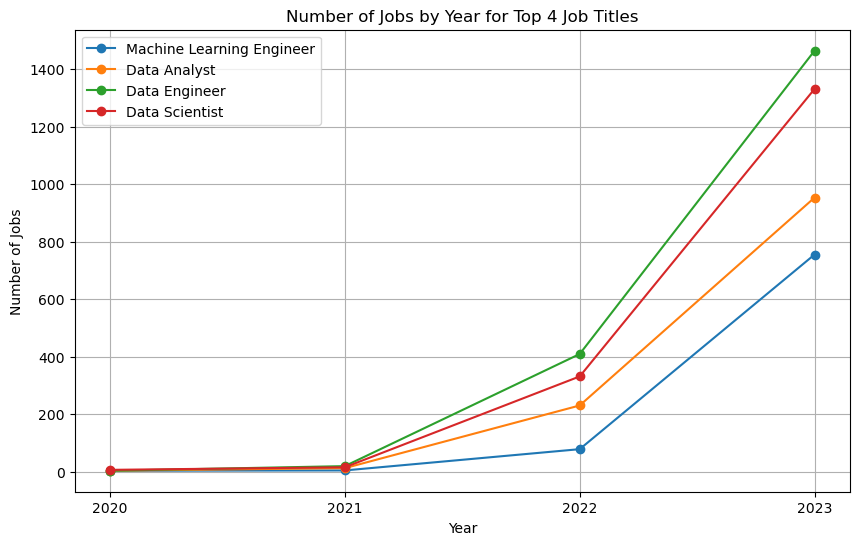

In [73]:
#Find Number of Jobs by year and then display in line graph
# Define the filters
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']


# Initialize an empty list to store line plots
line_plots = []

# Initialize the figure for plotting before the loop
plt.figure(figsize=(10, 6))

# Define markers and colors for differentiation
markers = ['o', 's', '^', 'x']
colors = ['b', 'g', 'r', 'c']

# Filter and count total for each job title by work_year
for job_title in top4jobtitles:
    employeeExperienceLevelwJobTitle = (
        df
        .filter(pl.col('employment_type').is_in(fullTime))
        .filter(pl.col('employee_residence').is_in(theStates))
        .filter(pl.col('job_title') == job_title)
        .groupby(['work_year'])
        .agg([
            pl.count().alias('job_count')
        ])
    )

    # Convert to pandas DataFrame
    employeeExperienceLevelwJobTitle_df = employeeExperienceLevelwJobTitle.to_pandas()

    # Sort the DataFrame by 'work_year' to ensure correct order
    employeeExperienceLevelwJobTitle_df.sort_values(by='work_year', inplace=True)

    # Plotting in a line graph for each job title
    line_plot, = plt.plot(employeeExperienceLevelwJobTitle_df['work_year'], employeeExperienceLevelwJobTitle_df['job_count'], marker='o', linestyle='-', label=job_title)
    line_plots.append(line_plot)

# Set the title, labels, grid, and legend for the plot
plt.title('Number of Jobs by Year for Top 4 Job Titles')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.legend(handles=line_plots)

# Display the line graph
plt.show()

/tmp/ipykernel_21419/678285102.py:24: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/678285102.py:24: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/678285102.py:24: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/678285102.py:24: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])


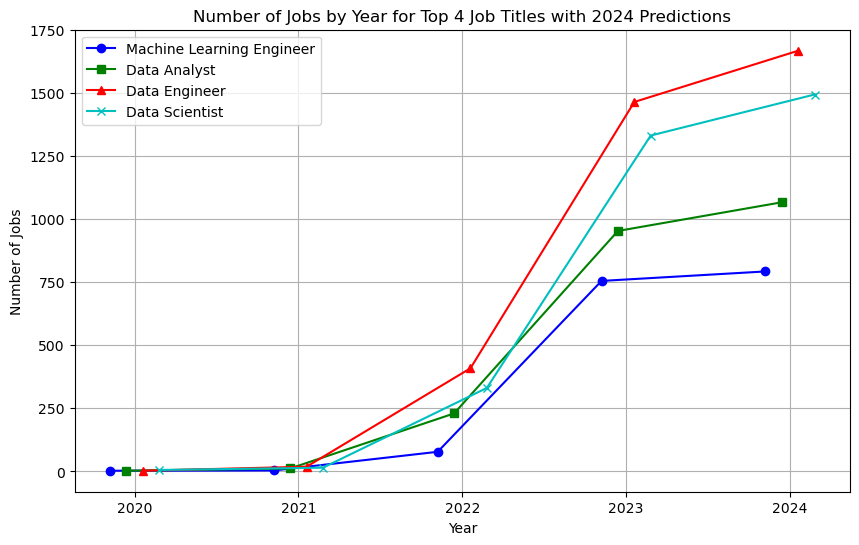

Predictions for 2024:
Machine Learning Engineer: 792 jobs
Data Analyst: 1066 jobs
Data Engineer: 1667 jobs
Data Scientist: 1494 jobs
Percent Increases from 2023 to 2024:
Machine Learning Engineer: 4.97%
Data Analyst: 11.91%
Data Engineer: 13.87%
Data Scientist: 12.21%


/tmp/ipykernel_21419/678285102.py:83: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/678285102.py:83: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/678285102.py:83: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_21419/678285102.py:83: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])


In [84]:
# Define the filters and job titles
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

# Initialize an empty list to store line plots and predictions
line_plots = []
predictions = {}

# Initialize the figure for plotting
plt.figure(figsize=(10, 6))

# Offset value for x-axis (years)
offset = 0.1

# Loop through each job title
for idx, job_title in enumerate(top4jobtitles):
    # Filter and group data
    grouped_data = (
        df
        .filter(pl.col('employment_type').is_in(fullTime))
        .filter(pl.col('employee_residence').is_in(theStates))
        .filter(pl.col('job_title') == job_title)
        .groupby(['work_year'])
        .agg([
            pl.count().alias('job_count')
        ])
    ).to_pandas()

    # Convert 'work_year' to numeric and sort
    grouped_data['work_year'] = pd.to_numeric(grouped_data['work_year'])
    grouped_data.sort_values(by='work_year', inplace=True)

    # Apply offset to the 'work_year'
    X = grouped_data['work_year'].values.reshape(-1, 1) + (idx - 1.5) * offset
    y = grouped_data['job_count'].values

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict for 2024
    prediction_2024 = model.predict(np.array([[2024 + (idx - 1.5) * offset]]))[0]
    predictions[job_title] = prediction_2024

    # Extend the line to include the prediction for 2024
    X_extended = np.append(X, [[2024 + (idx - 1.5) * offset]], axis=0)
    y_extended = np.append(y, prediction_2024)

    # Plotting the historical data with different colors and markers
    line_plot, = plt.plot(X_extended.flatten(), y_extended, marker=markers[idx], linestyle='-', color=colors[idx], label=job_title)
    line_plots.append(line_plot)

# Set the title, labels, grid, and legend for the plot
plt.title('Number of Jobs by Year for Top 4 Job Titles with 2024 Predictions')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.legend()

# Display the line graph with predictions
plt.show()

# Print out the predictions
print("Predictions for 2024:")
for job_title, prediction in predictions.items():
    print(f"{job_title}: {prediction:.0f} jobs")

#Calculate and fine percent increase of top 4 jobs
# Dictionary to store the job counts for 2023
jobs_2023 = {}

# Loop through each job title to get the number of jobs in 2023
for job_title in top4jobtitles:
    # Filter and group data for 2023
    data_2023 = (
        df
        .filter(pl.col('employment_type').is_in(fullTime))
        .filter(pl.col('employee_residence').is_in(theStates))
        .filter(pl.col('job_title') == job_title)
        .with_columns([pl.col('work_year').cast(pl.Int64)])  # Convert 'work_year' to numeric
        .filter(pl.col('work_year') == 2023)
        .groupby(['work_year'])
        .agg([
            pl.count().alias('job_count')
        ])
    ).to_pandas()

    # Store the job count for 2023
    if not data_2023.empty:
        jobs_2023[job_title] = data_2023['job_count'].iloc[0]
    else:
        jobs_2023[job_title] = 0

# Calculate the percent increase for each job title
percent_increases = {}
for job_title, prediction in predictions.items():
    jobs_in_2023 = jobs_2023.get(job_title, 0)
    if jobs_in_2023 > 0:
        percent_increase = ((prediction - jobs_in_2023) / jobs_in_2023) * 100
    else:
        percent_increase = float('inf')  # Infinite increase if there were no jobs in 2023
    percent_increases[job_title] = percent_increase

# Print out the percent increases
print("Percent Increases from 2023 to 2024:")
for job_title, percent_increase in percent_increases.items():
    print(f"{job_title}: {percent_increase:.2f}%")


/tmp/ipykernel_22877/2687079604.py:15: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/2687079604.py:27: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title'])


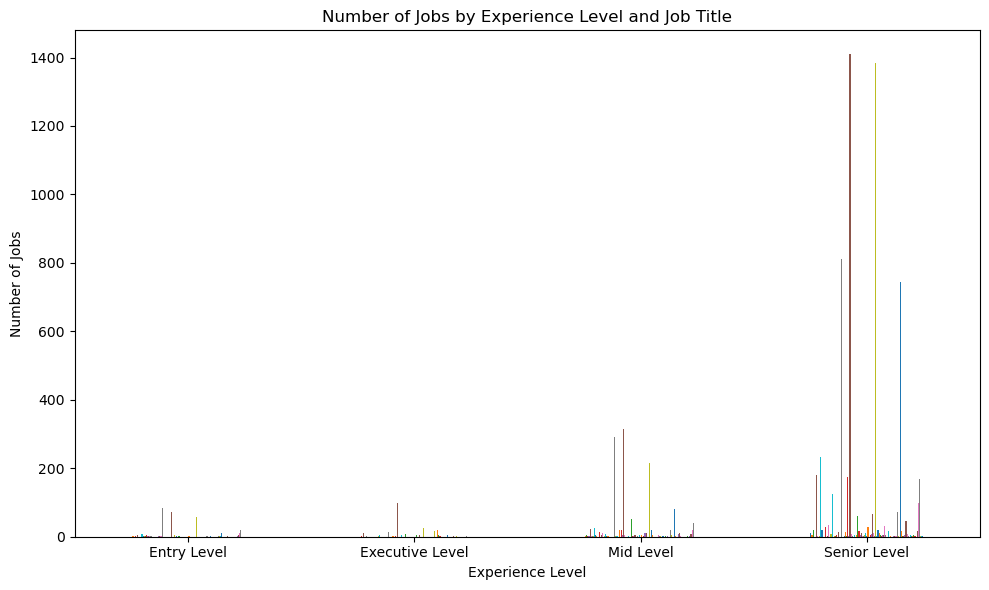

In [147]:
#Find Number of Jobs by experience level and then display in bar graph
#filter and count total for experience_level 
fullTime = ['FT']
theStates = ['US']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

employeeExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby(['experience_level', 'job_title'])
    .agg([
        pl.count().alias('job_count')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevel_df = employeeExperienceLevel.to_pandas()

# Pivot the DataFrame in Pandas
pivot_data_df = employeeExperienceLevel_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='job_count', 
    fill_value=0
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data_df.plot(kind='bar', ax=ax, legend=False)
ax.set_xticklabels(pivot_data_df.index, rotation=0)
plt.title('Number of Jobs by Experience Level and Job Title')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()


/tmp/ipykernel_22877/3843390205.py:16: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/3843390205.py:29: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title'])


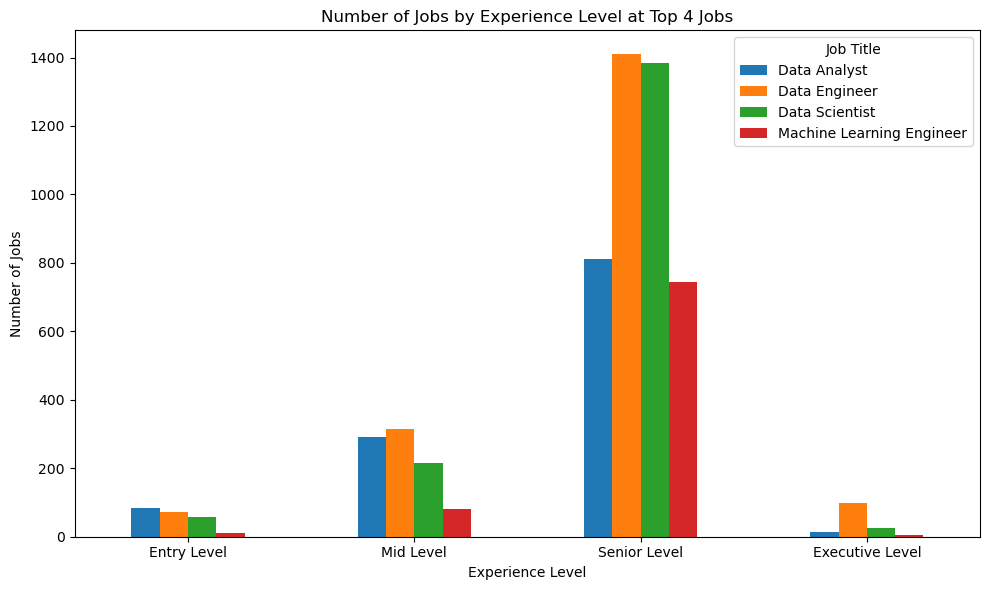

In [152]:
#Find Number of Jobs by experience level and then display in bar graph
#filter and count total for experience_level and top 4 job titles
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

employeeExperienceLevelwTop4Jobs = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level', 'job_title'])
    .agg([
        pl.count().alias('job_count')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwTop4Jobs_df = employeeExperienceLevelwTop4Jobs.to_pandas()

# Pivot the DataFrame in Pandas
pivot_data_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='job_count', 
    fill_value=0
)

# Define the desired order of experience levels based on your mapping
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']

# Convert the pivot_data_df index to a CategoricalIndex with the specified order
pivot_data_df.index = pd.CategoricalIndex(pivot_data_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_data_df.sort_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_data_df.index, rotation=0)
plt.title('Number of Jobs by Experience Level at Top 4 Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/25514002.py:21: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/25514002.py:30: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title'])


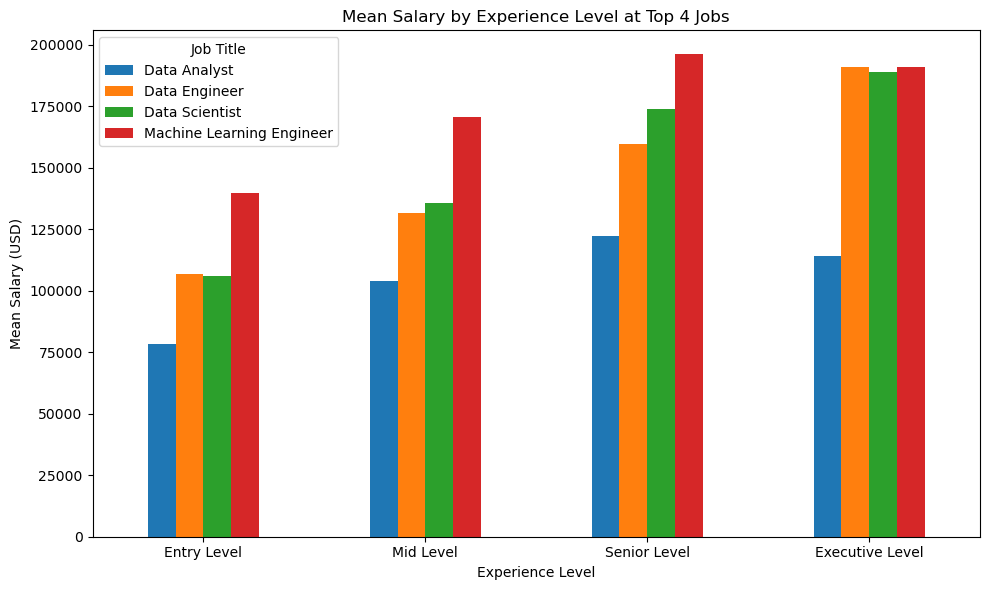

In [181]:
#Find Number of Jobs by experience level and then display in bar graph
#filter, count total for experience_level and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation
employeeExperienceLevelwTop4Jobs = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level', 'job_title'])
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwTop4Jobs_df = employeeExperienceLevelwTop4Jobs.to_pandas()

# Pivot the DataFrame in Pandas for job count
pivot_count_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='job_count', 
    fill_value=0
)

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='mean_salary', 
    fill_value=0
)

# Define the desired order of experience levels based on your mapping
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']

# Convert the pivot_salary_df index to a CategoricalIndex with the specified order
pivot_salary_df.index = pd.CategoricalIndex(pivot_salary_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_salary_df.sort_index(inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
pivot_salary_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_salary_df.index, rotation=0)
plt.title('Mean Salary by Experience Level at Top 4 Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

/tmp/ipykernel_21419/1488805504.py:31: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_21419/1488805504.py:40: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title', 'work_year'])


<Figure size 1000x600 with 0 Axes>

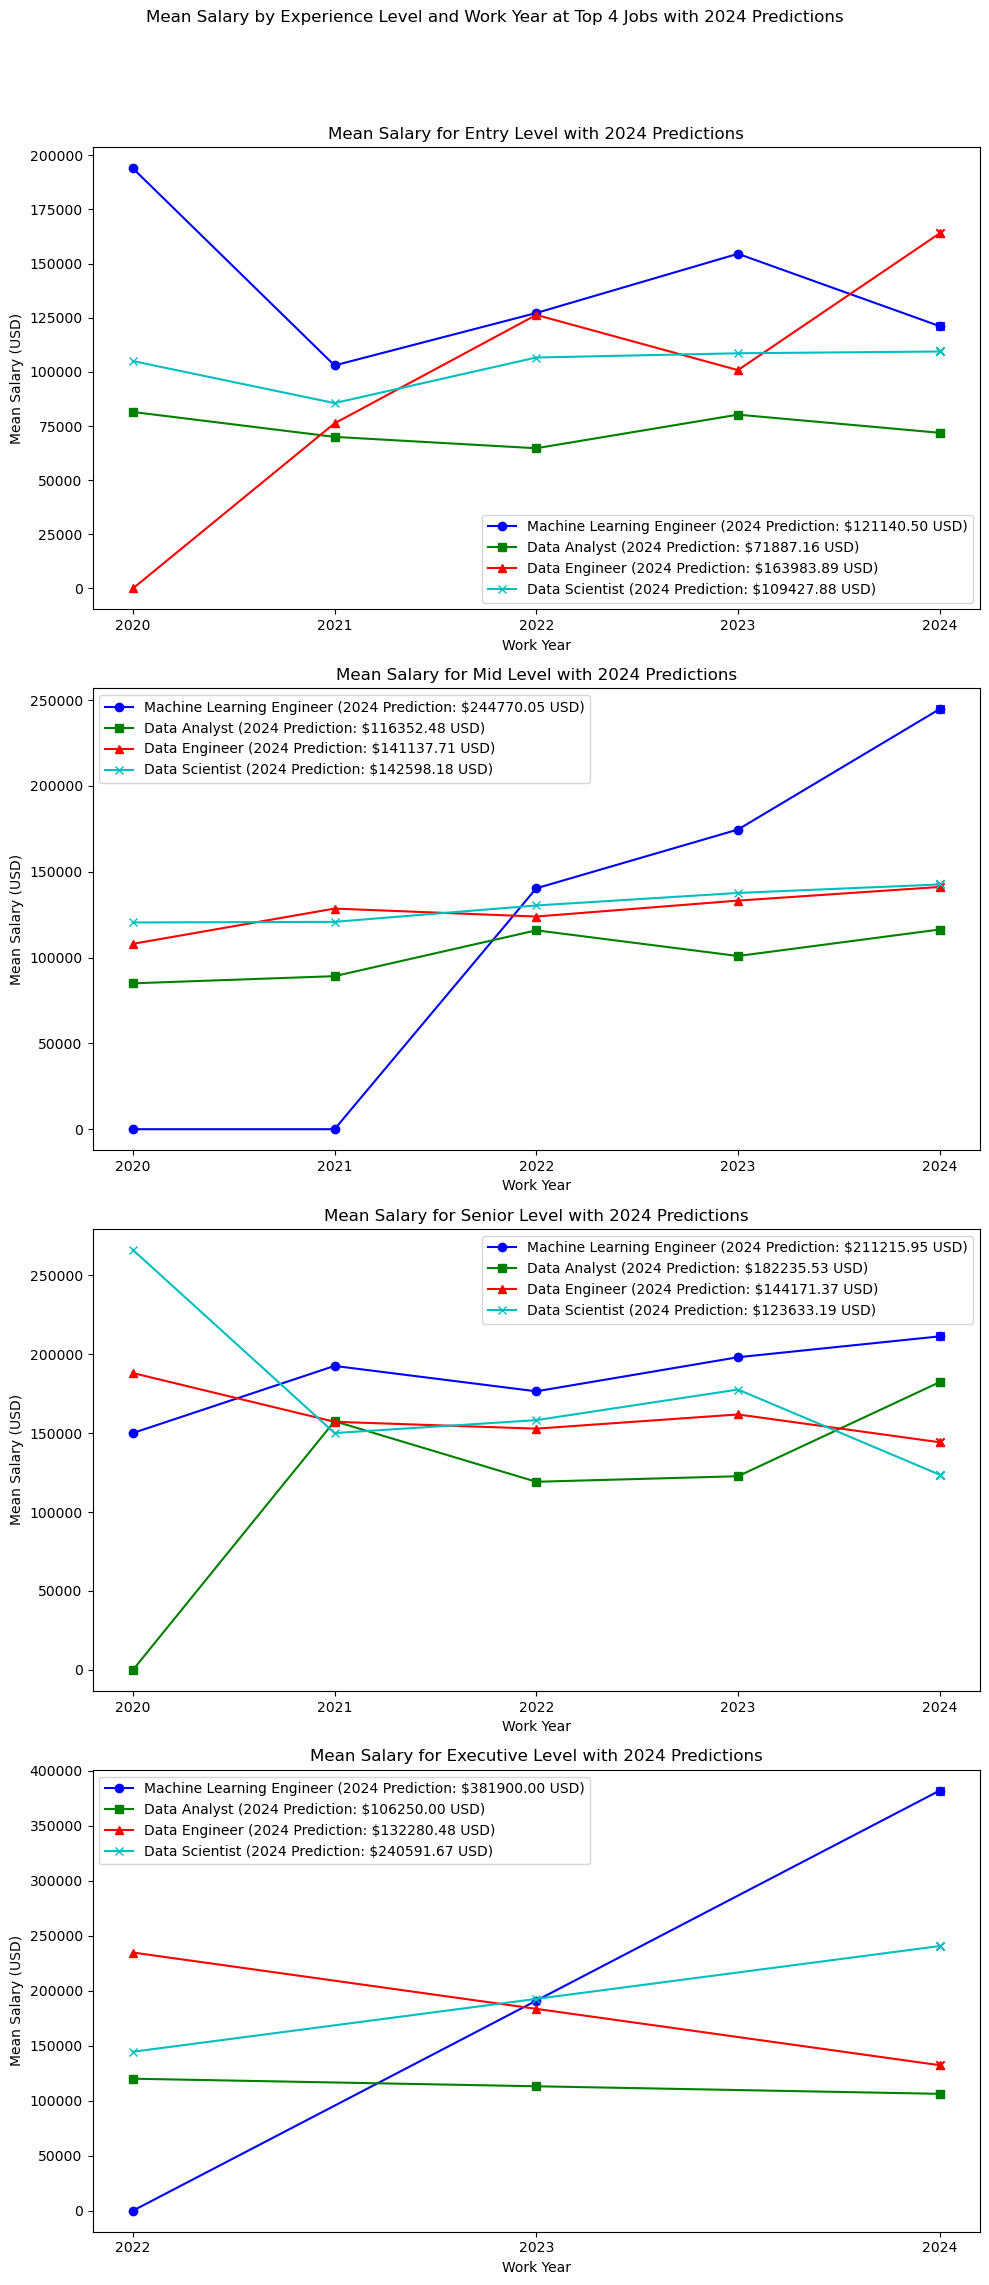

Salary Predictions for 2024:

Entry Level:
  Machine Learning Engineer: 121140.50 USD
  Data Analyst: 71887.16 USD
  Data Engineer: 163983.89 USD
  Data Scientist: 109427.88 USD

Mid Level:
  Machine Learning Engineer: 244770.05 USD
  Data Analyst: 116352.48 USD
  Data Engineer: 141137.71 USD
  Data Scientist: 142598.18 USD

Senior Level:
  Machine Learning Engineer: 211215.95 USD
  Data Analyst: 182235.53 USD
  Data Engineer: 144171.37 USD
  Data Scientist: 123633.19 USD

Executive Level:
  Machine Learning Engineer: 381900.00 USD
  Data Analyst: 106250.00 USD
  Data Engineer: 132280.48 USD
  Data Scientist: 240591.67 USD


In [92]:
#Find Number of Jobs by experience level and then display in line graph
#filter, count total for experience_level and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Initialize an empty list to store line plots and predictions
line_plots = []

# Initialize the figure for plotting
plt.figure(figsize=(10, 6))

# Offset value for x-axis (years)
offset = 0.1

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation including work_year
employeeExperienceLevelwTop4Jobs = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level', 'job_title', 'work_year'])
    .agg([
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
).to_pandas()

# Convert 'work_year' to numeric and sort
employeeExperienceLevelwTop4Jobs_df['work_year'] = pd.to_numeric(employeeExperienceLevelwTop4Jobs_df['work_year'])
employeeExperienceLevelwTop4Jobs_df.sort_values(by='work_year', inplace=True)

# Define the desired order of experience levels based on your mapping
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index=['experience_level', 'work_year'], 
    columns='job_title', 
    values='mean_salary', 
    fill_value=0
)

# Define markers and colors for differentiation
markers = ['o', 's', '^', 'x']
colors = ['b', 'g', 'r', 'c']

# Create a figure with subplots - one for each experience level
fig, axes = plt.subplots(nrows=len(experience_level_order), ncols=1, figsize=(10, 6 * len(experience_level_order)))

# Initialize a dictionary to store predictions
predictions = {}

# Loop through each experience level and job title to create and train models
for experience_level in experience_level_order:
    predictions[experience_level] = {}
    for job_idx, job_title in enumerate(top4jobtitles):
        # Prepare the data for modeling
        X = pivot_salary_df.xs(experience_level)[job_title].dropna().index.values.reshape(-1, 1)
        y = pivot_salary_df.xs(experience_level)[job_title].dropna().values

        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Predict for 2024
        prediction_2024 = model.predict(np.array([[2024]]))[0]
        predictions[experience_level][job_title] = prediction_2024

# Plot the data and predictions
for idx, experience_level in enumerate(experience_level_order):
    ax = axes[idx]
    for job_idx, job_title in enumerate(top4jobtitles):
        filtered_df = pivot_salary_df.xs(experience_level)[job_title].dropna()
        years = np.append(filtered_df.index.values, 2024)  # Append the year 2024
        salaries = np.append(filtered_df.values, predictions[experience_level][job_title])  # Append the predicted salary
        line, = ax.plot(years.astype(int), salaries, marker=markers[job_idx], linestyle='-', color=colors[job_idx])
        ax.scatter(2024, predictions[experience_level][job_title], marker='x', color=colors[job_idx])
        # Combine job title and prediction into a single legend entry
        line.set_label(f'{job_title} (2024 Prediction: ${predictions[experience_level][job_title]:.2f} USD)')
     # Explicitly set x-ticks to whole years
    ax.set_xticks(np.arange(min(years), max(years) + 1, 1).astype(int))    
    ax.set_title(f'Mean Salary for {experience_level} with 2024 Predictions')
    ax.set_xlabel('Work Year')
    ax.set_ylabel('Mean Salary (USD)')
    ax.legend()

plt.suptitle('Mean Salary by Experience Level and Work Year at Top 4 Jobs with 2024 Predictions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print out the predictions
print("Salary Predictions for 2024:")
for experience_level in experience_level_order:
    print(f"\n{experience_level}:")
    for job_title in top4jobtitles:
        prediction = predictions[experience_level].get(job_title, None)
        if prediction is not None:
            print(f"  {job_title}: {prediction:.2f} USD")
        else:
            print(f"  {job_title}: No data available for prediction")

In [37]:
# code to find salary to match external analysis with own data set
# Convert 'salary_in_usd' to numeric
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']

# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filter for 'Mid Level' and 'Senior Level' experience levels
filtered_df = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('experience_level').is_in(['Mid Level', 'Senior Level']))
)

# Define the job titles you want to include
job_titles_to_include = ['AI Engineer', 'Business Intelligence Developer', 'Computer Vision Engineer', 'Data Architect',
                         'Data Analyst', 'Data Engineer', 'Data Modeler', 'Data Scientist', 'Database Engineer',
                         'Machine Learning Engineer', 'Data Warehouse Analyst', 'Data Warehouse Developer', 'Database Administrator']

# Initialize lists to store data for Mid Level and Senior Level
mid_level_job_titles = []
mid_level_25th_percentile_salaries = []
mid_level_75th_percentile_salaries = []

senior_level_job_titles = []
senior_level_25th_percentile_salaries = []
senior_level_75th_percentile_salaries = []

# Loop through each job title and find the 25th and 75th percentile salaries for each experience level
for job_title in job_titles_to_include:
    mid_level_filtered_df = filtered_df.filter((pl.col('job_title') == job_title) & (pl.col('experience_level') == 'Mid Level'))
    senior_level_filtered_df = filtered_df.filter((pl.col('job_title') == job_title) & (pl.col('experience_level') == 'Senior Level'))
    
    if not mid_level_filtered_df.is_empty():
        mid_level_25th_percentile_salary = mid_level_filtered_df['salary_in_usd'].quantile(0.25)
        mid_level_75th_percentile_salary = mid_level_filtered_df['salary_in_usd'].quantile(0.75)
        
        mid_level_job_titles.append(job_title)
        mid_level_25th_percentile_salaries.append(mid_level_25th_percentile_salary)
        mid_level_75th_percentile_salaries.append(mid_level_75th_percentile_salary)
    else:
        mid_level_job_titles.append(job_title)
        mid_level_25th_percentile_salaries.append(None)
        mid_level_75th_percentile_salaries.append(None)
    
    if not senior_level_filtered_df.is_empty():
        senior_level_25th_percentile_salary = senior_level_filtered_df['salary_in_usd'].quantile(0.25)
        senior_level_75th_percentile_salary = senior_level_filtered_df['salary_in_usd'].quantile(0.75)
        
        senior_level_job_titles.append(job_title)
        senior_level_25th_percentile_salaries.append(senior_level_25th_percentile_salary)
        senior_level_75th_percentile_salaries.append(senior_level_75th_percentile_salary)
    else:
        senior_level_job_titles.append(job_title)
        senior_level_25th_percentile_salaries.append(None)
        senior_level_75th_percentile_salaries.append(None)

# Create DataFrames for Mid Level and Senior Level
mid_level_salary_table = pd.DataFrame({
    'Job Title': mid_level_job_titles,
    '25th Percentile Salary (Mid Level)': mid_level_25th_percentile_salaries,
    '75th Percentile Salary (Mid Level)': mid_level_75th_percentile_salaries
})

senior_level_salary_table = pd.DataFrame({
    'Job Title': senior_level_job_titles,
    '25th Percentile Salary (Senior Level)': senior_level_25th_percentile_salaries,
    '75th Percentile Salary (Senior Level)': senior_level_75th_percentile_salaries
})

# Display the tables
print("Mid Level Salaries:")
print(mid_level_salary_table)
print("Senior Level Salaries:")
print(senior_level_salary_table)

/tmp/ipykernel_21419/4073080246.py:20: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')


Mid Level Salaries:
                          Job Title  25th Percentile Salary (Mid Level)  \
0                       AI Engineer                            140000.0   
1   Business Intelligence Developer                            110000.0   
2          Computer Vision Engineer                                 NaN   
3                    Data Architect                            110000.0   
4                      Data Analyst                             75000.0   
5                     Data Engineer                            100000.0   
6                      Data Modeler                             73100.0   
7                    Data Scientist                            106200.0   
8                 Database Engineer                                 NaN   
9         Machine Learning Engineer                            130000.0   
10           Data Warehouse Analyst                                 NaN   
11         Data Warehouse Developer                                 NaN   
12   

/tmp/ipykernel_22877/2926044165.py:22: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')


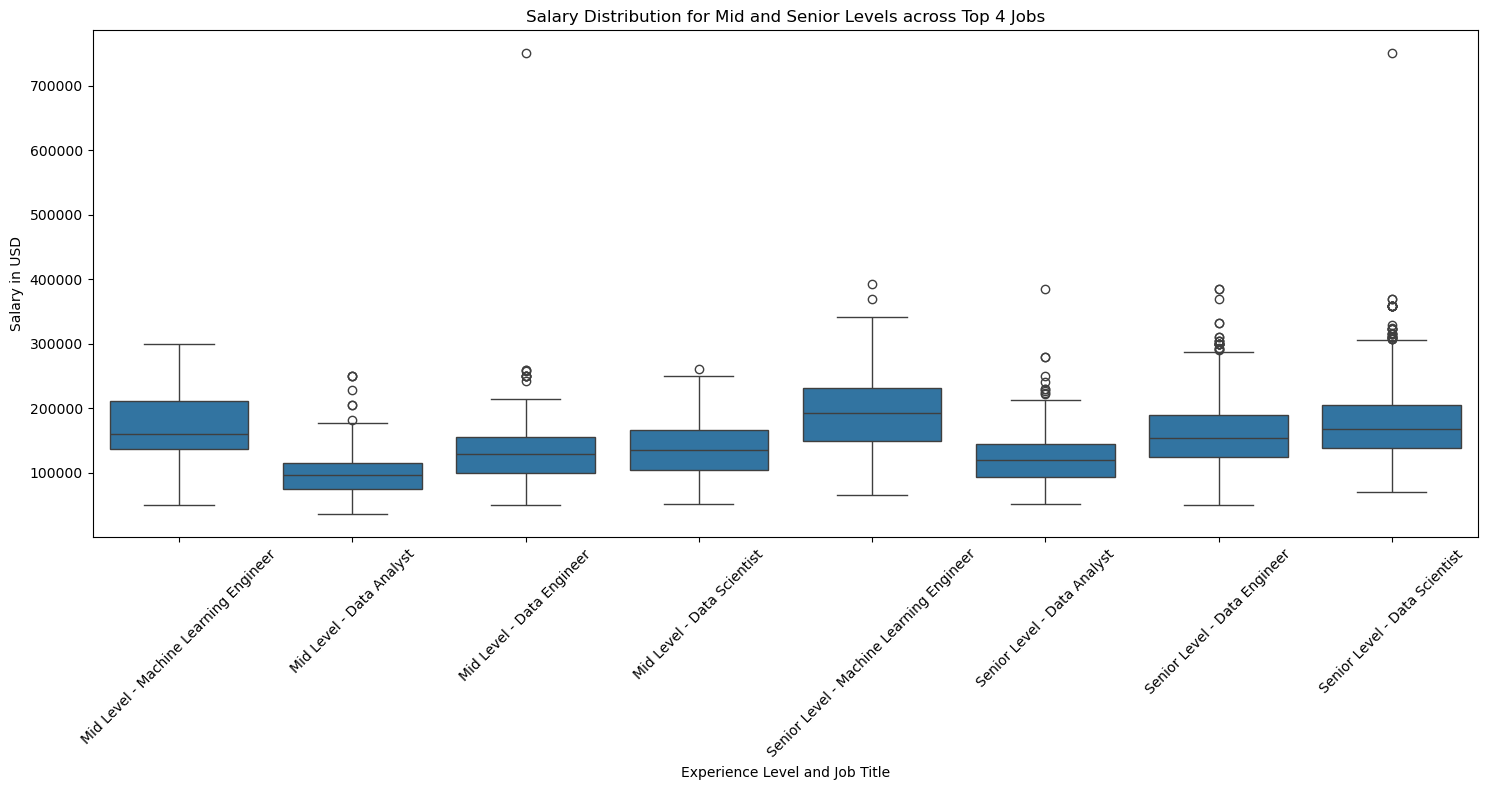

In [188]:
#Find Number of Jobs by experience level and then display in box plot
#filter, count total for experience_level and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering the data
filtered_df = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .filter(pl.col('experience_level').is_in(['Mid Level', 'Senior Level']))
    .filter(pl.col('work_year').is_in(['2023'])) 
)

# Convert to pandas DataFrame
filtered_df = filtered_df.to_pandas()

# Create a new column combining experience level and job title
filtered_df['exp_job'] = filtered_df['experience_level'] + ' - ' + filtered_df['job_title']

# Define the desired order of experience levels and job titles
exp_job_order = [level + ' - ' + job for level in ['Mid Level', 'Senior Level'] for job in top4jobtitles]

# Convert the exp_job column to a Categorical type with the specified order
filtered_df['exp_job'] = pd.Categorical(filtered_df['exp_job'], categories=exp_job_order, ordered=True)

# Plotting the box plot for salary distribution
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='exp_job', y='salary_in_usd', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Salary Distribution for Mid and Senior Levels across Top 4 Jobs')
plt.xlabel('Experience Level and Job Title')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/4193945339.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('company_size')


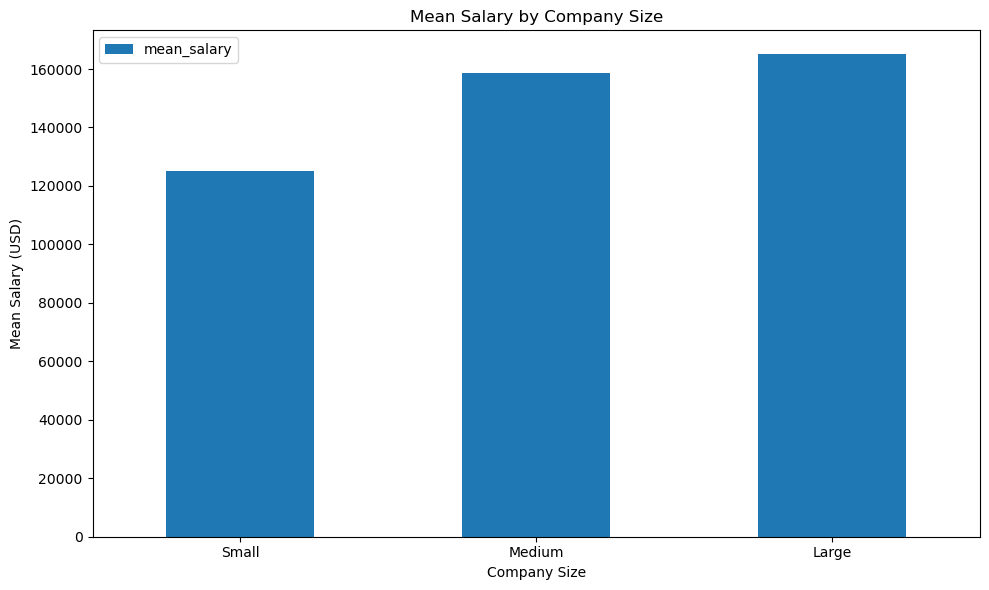

In [170]:
#Find average Salary by  company size
#filter, count total for company_size and find mean salary_in_usd 
# Convert 'salary_in_usd' to numeric
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
# Dictionary for company size names
company_names = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Filtering and grouping with mean salary calculation
employeeSalaryByCompanySize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('company_size')
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeSalaryByCompanySize_df = employeeSalaryByCompanySize.to_pandas()

# Map the company_size to names
employeeSalaryByCompanySize_df['company_size'] = employeeSalaryByCompanySize_df['company_size'].map(company_names)

# Define the desired order of company sizes
company_order = ['Small', 'Medium', 'Large']

# Convert the company_size column to a Categorical type with the specified order
employeeSalaryByCompanySize_df['company_size'] = pd.Categorical(employeeSalaryByCompanySize_df['company_size'], categories=company_order, ordered=True)

# Sorting the DataFrame by the new categorical company_size
employeeSalaryByCompanySize_df.sort_values(by='company_size', inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
employeeSalaryByCompanySize_df.plot(x='company_size', y='mean_salary', kind='bar', ax=ax)
ax.set_xticklabels(employeeSalaryByCompanySize_df['company_size'], rotation=0)
plt.title('Mean Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary (USD)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/4184199835.py:27: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/4184199835.py:35: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level','company_size', 'job_title'])


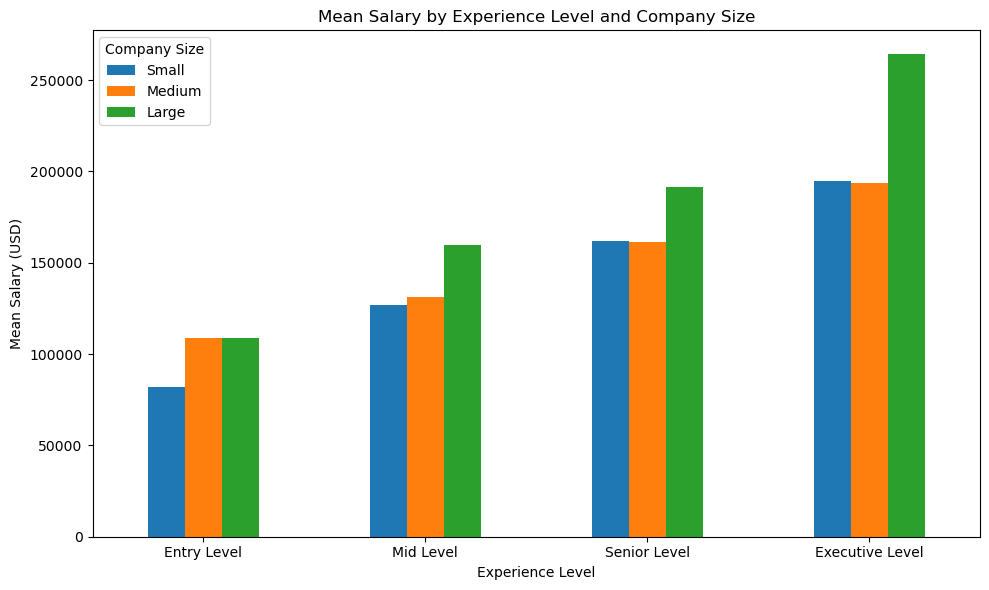

In [175]:
#Find average Salary by Experience Level and company size
#filter, count total for company_size and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Dictionary for company size names
company_size_names = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation
employeeExperienceLevelwcompanysize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby(['experience_level','company_size', 'job_title'])
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwcompanysize_df = employeeExperienceLevelwcompanysize.to_pandas()

# Map the company_size to names
employeeExperienceLevelwcompanysize_df['company_size'] = employeeExperienceLevelwcompanysize_df['company_size'].map(company_size_names)

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwcompanysize_df.pivot_table(
    index='experience_level', 
    columns='company_size', 
    values='mean_salary', 
    fill_value=0,
    aggfunc='mean'
)

# Define the desired order of experience levels and company sizes
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
company_size_order = ['Small', 'Medium', 'Large']

# Reorder the columns based on company size
pivot_salary_df = pivot_salary_df[company_size_order]

# Convert the pivot_salary_df index to a CategoricalIndex with the specified order
pivot_salary_df.index = pd.CategoricalIndex(pivot_salary_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_salary_df.sort_index(inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
pivot_salary_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_salary_df.index, rotation=0)
plt.title('Mean Salary by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/1872394933.py:28: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/1872394933.py:37: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level','company_size', 'job_title'])


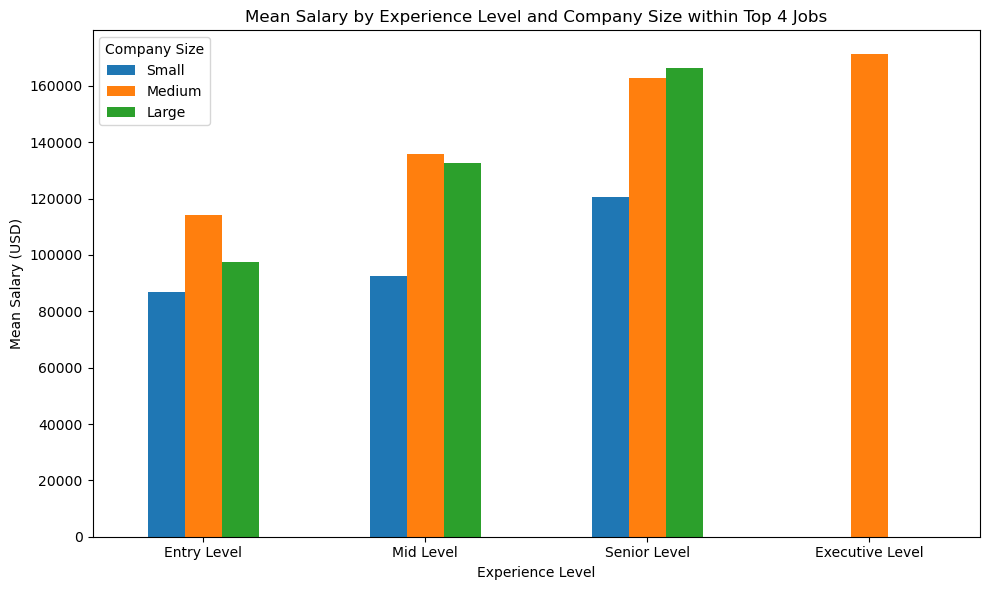

In [193]:
#Find average Salary by Experience Level and company size
#filter, count total for company_size and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Dictionary for company size names
company_size_names = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation
employeeExperienceLevelwcompanysize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level','company_size', 'job_title'])
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwcompanysize_df = employeeExperienceLevelwcompanysize.to_pandas()

# Map the company_size to names
employeeExperienceLevelwcompanysize_df['company_size'] = employeeExperienceLevelwcompanysize_df['company_size'].map(company_size_names)

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwcompanysize_df.pivot_table(
    index='experience_level', 
    columns='company_size', 
    values='mean_salary', 
    fill_value=0,
    aggfunc='mean'
)

# Define the desired order of experience levels and company sizes
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
company_size_order = ['Small', 'Medium', 'Large']

# Reorder the columns based on company size
pivot_salary_df = pivot_salary_df[company_size_order]

# Convert the pivot_salary_df index to a CategoricalIndex with the specified order
pivot_salary_df.index = pd.CategoricalIndex(pivot_salary_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_salary_df.sort_index(inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
pivot_salary_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_salary_df.index, rotation=0)
plt.title('Mean Salary by Experience Level and Company Size within Top 4 Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()